In [1]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG, plot_boxplot_fitness_hue
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


logger = ExperimentLogger('../results/BBOB-BO', True)
logger.add_read_dir('../results/BBOB-BO2')


In [2]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LLaMEA (1+1)', 'LLaMEA (4+16)', 'LLaMEA (4,16)', 'LLaMEA-4o-mini (4+16)', 'RandomSearch']
['BBOB']


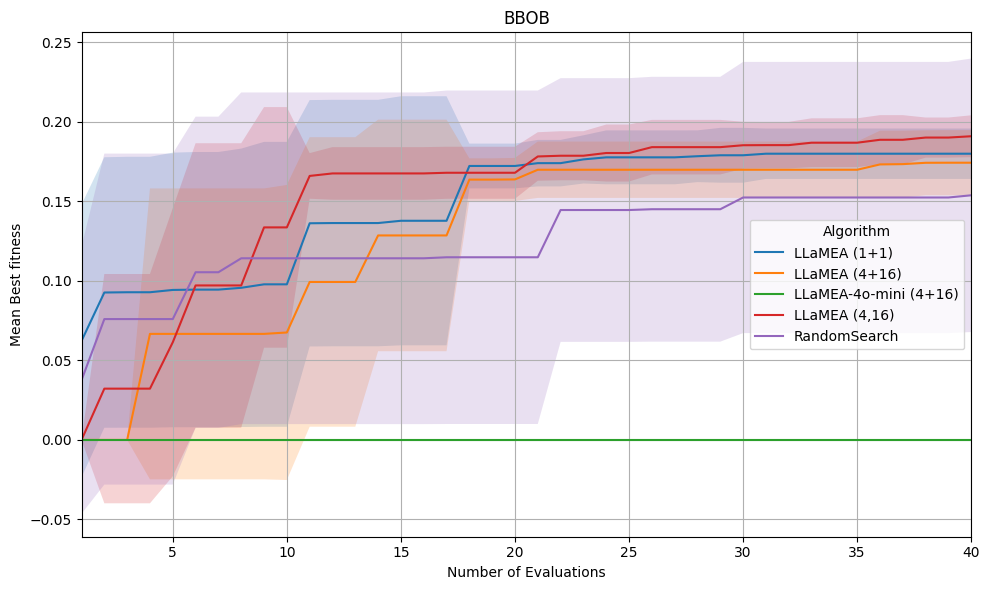

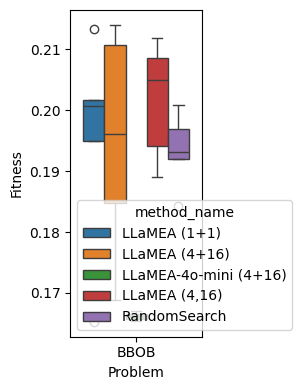

In [4]:

#data = logger.get_problem_data(problem_name="BBOB")
#print(data.head())

#data.replace([-np.Inf, np.Inf], 0, inplace=True)
#data.fillna(0, inplace=True)
#data.to_pickle("llamea-data.pkl")

        # # Get unique method names
        # methods = data["method_name"].unique()
        # ax = axes[problem_i] if len(problems) > 1 else axes
        # for method in methods:
        #     method_data = data[data["method_name"] == method].copy()
        #     method_data = method_data.sort_values(by=["seed", "_id"])

        #     # Group by 'seed' and calculate the cumulative max fitness
        #     method_data["cummax_fitness"] = method_data.groupby("seed")[
        #         "fitness"
        #     ].cummax()

        #     # Calculate mean and std deviation of the cumulative max fitness
        #     if separate_lines:
        #         for seed in method_data["seed"].unique():
        #             seed_data = method_data[method_data["seed"] == seed]
        #             ax.plot(
        #                 seed_data["_id"],
        #                 seed_data["cummax_fitness"],
        #                 label=f"{method} (Run {seed})",
        #                 alpha=0.5,
        #             )
        #     else:
        #         summary = (
        #             method_data.groupby("_id")["cummax_fitness"]
        #             .agg(["mean", "std"])
        #             .reset_index()
        #         )
        #         # Shift X-axis so that _id starts at 1
        #         summary["_id"] += 1  # Ensures _id starts at 1 instead of 0

        #         # Plot the mean fitness
        #         ax.plot(summary["_id"], summary["mean"], label=method)

        #         # Plot the shaded error region
        #         ax.fill_between(
        #             summary["_id"],
        #             summary["mean"] - summary["std"],
        #             summary["mean"] + summary["std"],
        #             alpha=0.2,
        #         )

plot_convergence(logger, metric="fitness", save=False, budget=40)
plot_boxplot_fitness_hue(logger)

# method_names = {"LLaMEA-o4-mini": "LLaMEA-o4-mini",
#                 "o4-mini": "o4-mini",
#                 "o4 (no info)": "o4-no-info"}

# for problem in problems:
#     data = logger.get_problem_data(problem_name=problem)
#     for method in methods:
#         # first on method
#         method_data = data[data['method_name'] == method].copy().reset_index()
#         idx = method_data['fitness'].idxmax()
#         print(problem, idx, method_data.iloc[idx]['name'], method)
#         with open(f'../results/kerneltuner-o4-mini/alg-{problem}-{method_names[method]}.py', 'w', encoding='utf-8') as f:
#             f.write(method_data.iloc[idx]['code'])

